In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Customers.csv')

# Inspect the dataset
print(df.head())
print(df.info())
print(df.describe())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  10-07-2022
1      C0002      Elizabeth Lutz           Asia  13-02-2022
2      C0003      Michael Rivera  South America  07-03-2024
3      C0004  Kathleen Rodriguez  South America  09-10-2022
4      C0005         Laura Weber           Asia  15-08-2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America

In [12]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
df = df.drop_duplicates()


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
SignupYear      0
SignupMonth     0
dtype: int64


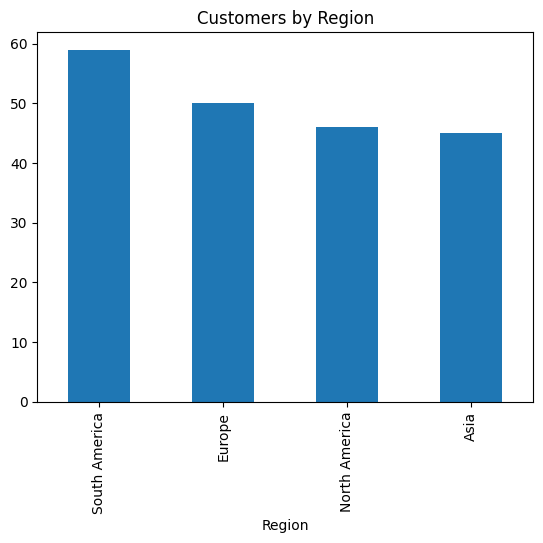

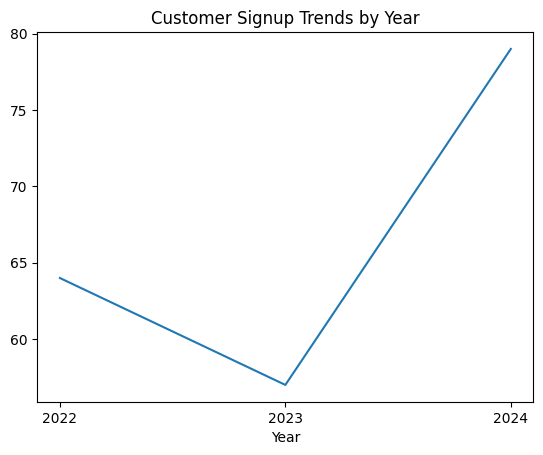

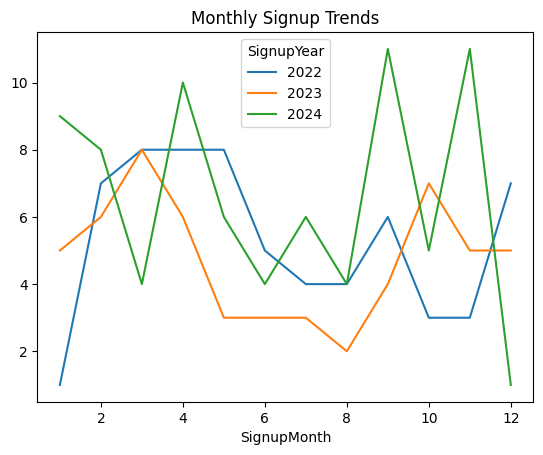

In [7]:
# Region-wise distribution
region_counts = df['Region'].value_counts()
region_counts.plot(kind='bar', title='Customers by Region')
plt.show()

# Signup trends over time
# df['SignupYear'] = df['SignupDate'].dt.year
# signup_trends = df['SignupYear'].value_counts().sort_index()
# signup_trends.plot(kind='line', title='Customer Signup Trends by Year')
# plt.show()



# Extract the signup year
df['SignupYear'] = df['SignupDate'].dt.year

# Count the number of signups per year and sort by year
signup_trends = df['SignupYear'].value_counts().sort_index()

# Plot the signup trends
signup_trends.plot(kind='line', title='Customer Signup Trends by Year')

# Set custom x-axis labels (only years)
plt.xlabel('Year')
plt.xticks(signup_trends.index)  # Set ticks to the years

# Show the plot
plt.show()

# Monthly signup trends
df['SignupMonth'] = df['SignupDate'].dt.month
monthly_signups = df.groupby(['SignupYear', 'SignupMonth']).size()
monthly_signups.unstack(0).plot(kind='line', title='Monthly Signup Trends')
plt.show()
